# neural network on dataset attributes (table 1)

### (20 features)

In [ ]:
from keras.models import model_from_json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import *
from keras import callbacks
from keras.utils.np_utils import *

print("Done Loading")


Done Loading


In [ ]:
full_df = pd.read_csv("https://raw.githubusercontent.com/jwaldroop/phishing-url-project/main/dataset_full.csv")

full_df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,...,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,...,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,...,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


In [ ]:
y = full_df['phishing']

features_table1 = ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url',
                   'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url',
                   'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url',
                   'length_url', 'email_in_url'] 

X = full_df[features_table1]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=808)

train_X.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,email_in_url
5676,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,0
39002,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13,0
1732,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16,0
39668,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26,0
82035,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28,0


In [ ]:
X.shape

(88647, 20)

In [ ]:
len(val_y)

22162

In [ ]:
len(val_y[val_y == 1])

7643

In [ ]:
len(val_y) - len(val_y[val_y == 1])

14519

In [ ]:
len(full_df[full_df.phishing == 1])

30647

In [ ]:
len(train_y[train_y == 1])

23004

In [ ]:
len(train_y)

66485

#### train_test_split did well
#### full dataset is ~ 34% phishing URLs; validation and train sets both have ~34% phishing URLs

### neural net - build/fit/predict

In [ ]:
tf.keras.backend.clear_session()

#neural net

table1_nn = keras.Sequential([
                          layers.InputLayer(input_shape=[20]),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=50, activation='relu'),
                          layers.Dropout(0.20),
                          layers.Dense(units=32, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=32, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=16, activation='relu'),
                          layers.Dropout(0.40),
                          layers.Dense(units=16, activation='relu'),
                          layers.Dropout(0.40),
                          layers.Dense(units=20, activation='relu'),
                          layers.Flatten(),
                          layers.Dense(units=1, activation='sigmoid')
])

table1_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy(), 
             tf.keras.metrics.AUC(),
             ]
)

earlystopping = callbacks.EarlyStopping(monitor = 'val_binary_accuracy', mode = 'max',
                                       patience = 25, restore_best_weights = True)


table1_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3250      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1

In [ ]:
history = table1_nn.fit(train_X, train_y, validation_split=0.30, batch_size= 15, epochs=500, callbacks = [earlystopping])

Epoch 1/500
3103/3103 [==============================] - 11s 3ms/step - loss: 0.4536 - binary_accuracy: 0.8006 - auc: 0.8579 - val_loss: 0.2818 - val_binary_accuracy: 0.8934 - val_auc: 0.9532
Epoch 2/500
3103/3103 [==============================] - 9s 3ms/step - loss: 0.2808 - binary_accuracy: 0.8788 - auc: 0.9435 - val_loss: 0.3032 - val_binary_accuracy: 0.8870 - val_auc: 0.9547
Epoch 3/500
3103/3103 [==============================] - 9s 3ms/step - loss: 0.2680 - binary_accuracy: 0.8826 - auc: 0.9482 - val_loss: 0.2559 - val_binary_accuracy: 0.8934 - val_auc: 0.9585
Epoch 4/500
3103/3103 [==============================] - 10s 3ms/step - loss: 0.2602 - binary_accuracy: 0.8847 - auc: 0.9509 - val_loss: 0.2552 - val_binary_accuracy: 0.8932 - val_auc: 0.9574
Epoch 5/500
3103/3103 [==============================] - 10s 3ms/step - loss: 0.2585 - binary_accuracy: 0.8857 - auc: 0.9514 - val_loss: 0.2635 - val_binary_accuracy: 0.8939 - val_auc: 0.9591
Epoch 6/500
3103/3103 [===================

In [ ]:
history_df = pd.DataFrame(history.history)

history_df.describe()

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.247057,0.894750,0.955768,0.242002,0.896814,0.962967
std,0.015081,0.006491,0.005301,0.012573,0.004215,0.002158
min,0.239268,0.849094,0.915803,0.225008,0.882483,0.953179
25%,0.241858,0.894862,0.955860,0.233331,0.894265,0.962663
50%,0.243635,0.896474,0.957052,0.239446,0.897373,0.963684
75%,0.246978,0.897269,0.957553,0.246331,0.900130,0.964255
max,0.361627,0.898966,0.958707,0.303181,0.903239,0.965058


In [ ]:
train_acc = table1_nn.evaluate(train_X, train_y)
test_acc = table1_nn.evaluate(val_X, val_y)

693/693 [==============================] - 1s 1ms/step - loss: 0.2360 - binary_accuracy: 0.9003 - auc: 0.9644


In [ ]:
dict(zip(table1_nn.metrics_names, test_acc))

{'auc': 0.9643808603286743,
 'binary_accuracy': 0.9002797603607178,
 'loss': 0.23598067462444305}

Minimum validation loss (binary_crossentropy): 0.2250083088874817


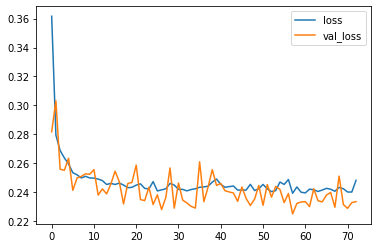

In [ ]:
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss (binary_crossentropy): {}".format(history_df['val_loss'].min()))

Maximum AUC: 0.9650578498840332


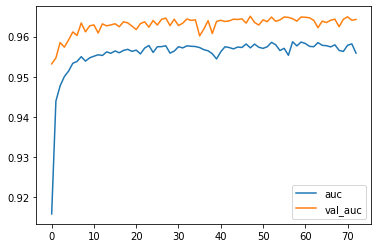

In [ ]:
history_df.loc[:, ['auc', 'val_auc']].plot();
print("Maximum AUC: {}".format(history_df['val_auc'].max()))

Maximum validation binary accuracy: 0.9032387733459473


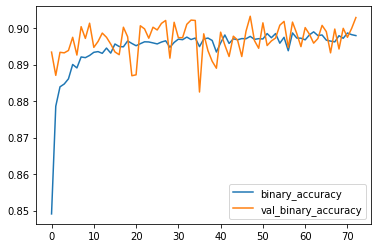

In [ ]:
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
print("Maximum validation binary accuracy: {}".format(history_df['val_binary_accuracy'].max()))

In [ ]:
preds1 = table1_nn.predict(val_X)
preds1

array([[0.83254635],
       [0.02845484],
       [0.61256826],
       ...,
       [0.02411366],
       [0.03616592],
       [0.56627095]], dtype=float32)

In [ ]:
len(preds1[preds1 < 0.5])

13579

In [ ]:
len(preds1[preds1 >= 0.5])

8583

In [ ]:
len(val_y)

22162